In [1]:
!date
!pwd

Втр Фев 21 14:30:31 MSK 2017
/home/sphere/github/Sphere/CheckTrigger


In [43]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
#from tqdm import tqdm
import math as mt
import numpy as np

In [44]:
# чтение данных обработки экспериментальных событий триггером
datum = pd.read_csv('trig.2013.csv', index_col=0)
# количество событий
len(datum)

3813

In [45]:
# чтение событий ШАЛ 
dima = pd.read_csv('namesEAS', header = 0, index_col=0, sep='\s+')
eas  = pd.core.frame.DataFrame(dima, columns=['EAS'])
eas['EAS'] = int(1)
print(len(eas))
# добавляем признак ШАЛ к данным
datum=datum.join(eas)
# заменяем NAN на 0
datum.fillna(0, inplace=True)

462


In [46]:
datum[:5]

,Date,Time,Type,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,EAS
EID,,,,,,,,,,
10675,2013-03-09,18:16:20,E,10,688,242,241,242,241,1.0
10676,2013-03-09,18:16:20,C,0,6104408,242,243,243,242,0.0
10677,2013-03-09,18:18:12,E,29,1336,241,240,243,240,1.0
10678,2013-03-09,18:18:12,C,0,6205188,242,242,243,242,0.0
10679,2013-03-09,18:18:25,D,76,7143,242,250,252,242,0.0


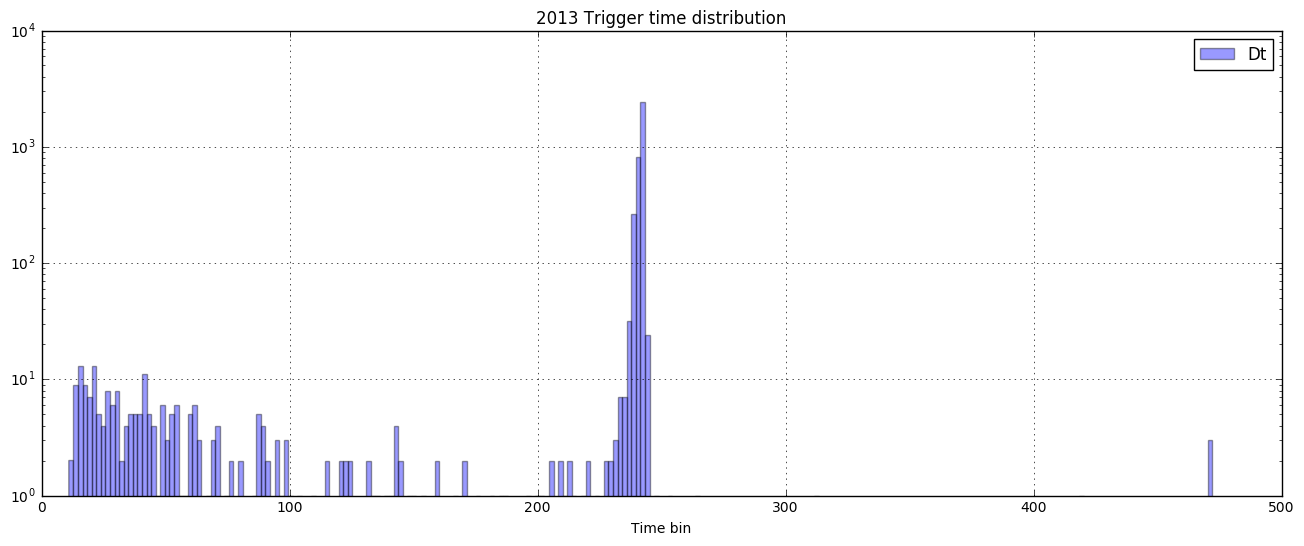

In [6]:
plt.figure(figsize=(16,6))
plt.hist(datum['TRIGGER'],  bins=250, alpha=0.4, label=r"Dt")
#plt.hist(AllTrig_g5[:], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.title('2013 Trigger time distribution')
plt.xlabel('Time bin')
plt.grid()

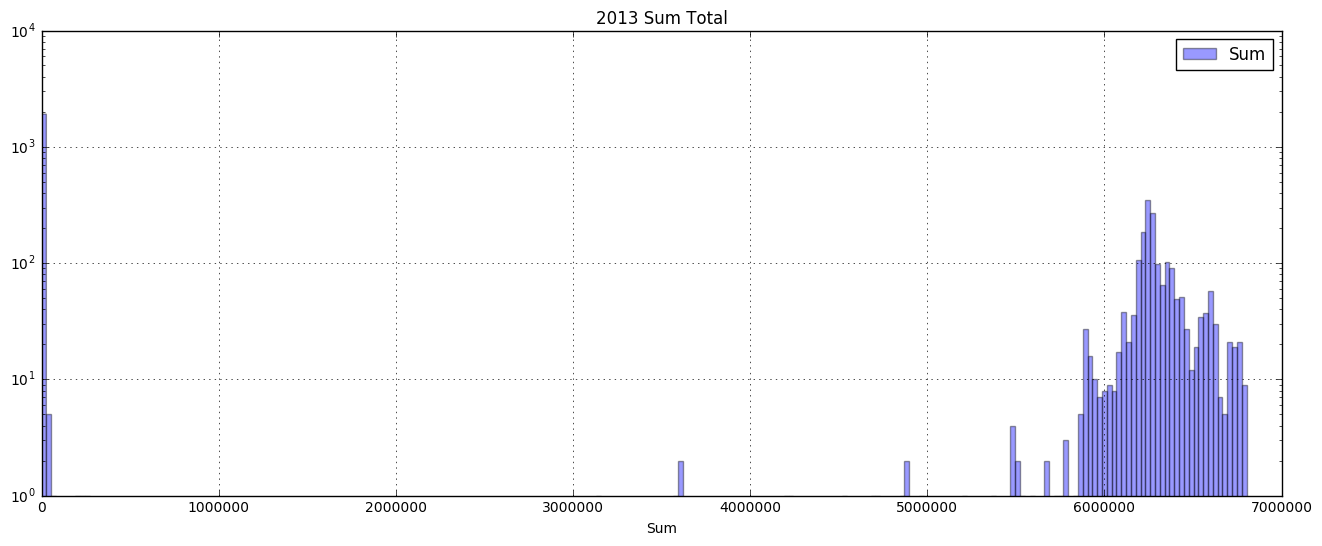

In [7]:
plt.figure(figsize=(16,6))
plt.hist(datum['Atotal'],  bins=250, alpha=0.4, label=r"Sum")
plt.legend(loc=1)
plt.yscale('log')
plt.title('2013 Sum Total')
plt.xlabel('Sum')
plt.grid()

Калибровочные кадры --- с суммарными амплитудами > 3000000

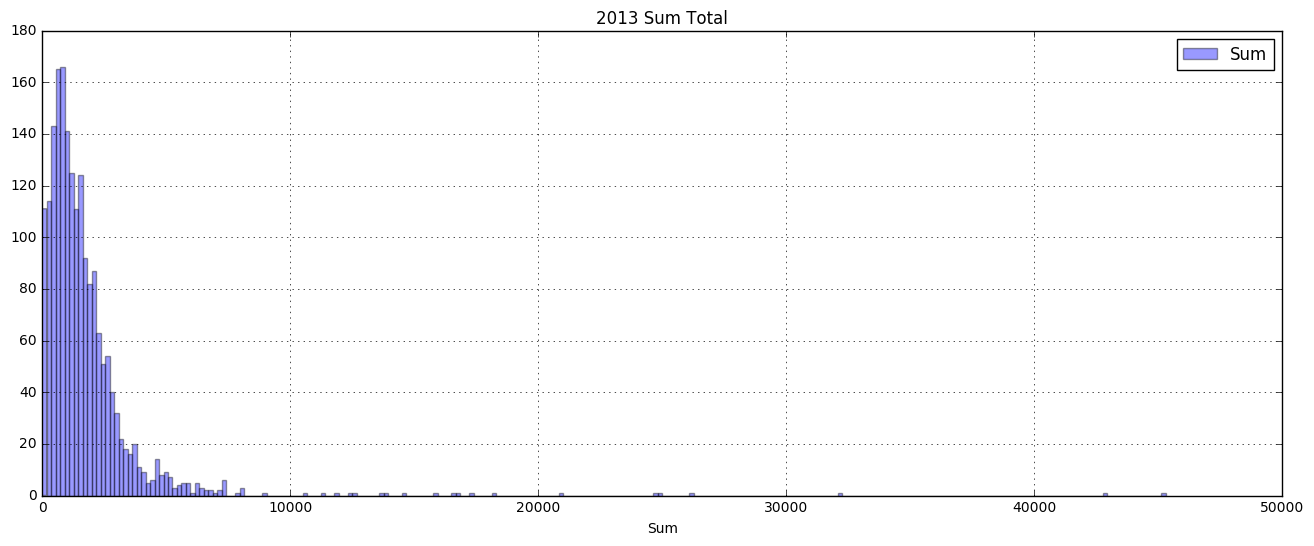

In [15]:
plt.figure(figsize=(16,6))
plt.hist(datum['Atotal'][datum['Atotal']<50000],  bins=250, alpha=0.4, label=r"Sum")
plt.legend(loc=1)
#plt.yscale('log')
plt.title('2013 Sum Total')
plt.xlabel('Sum')
plt.grid()

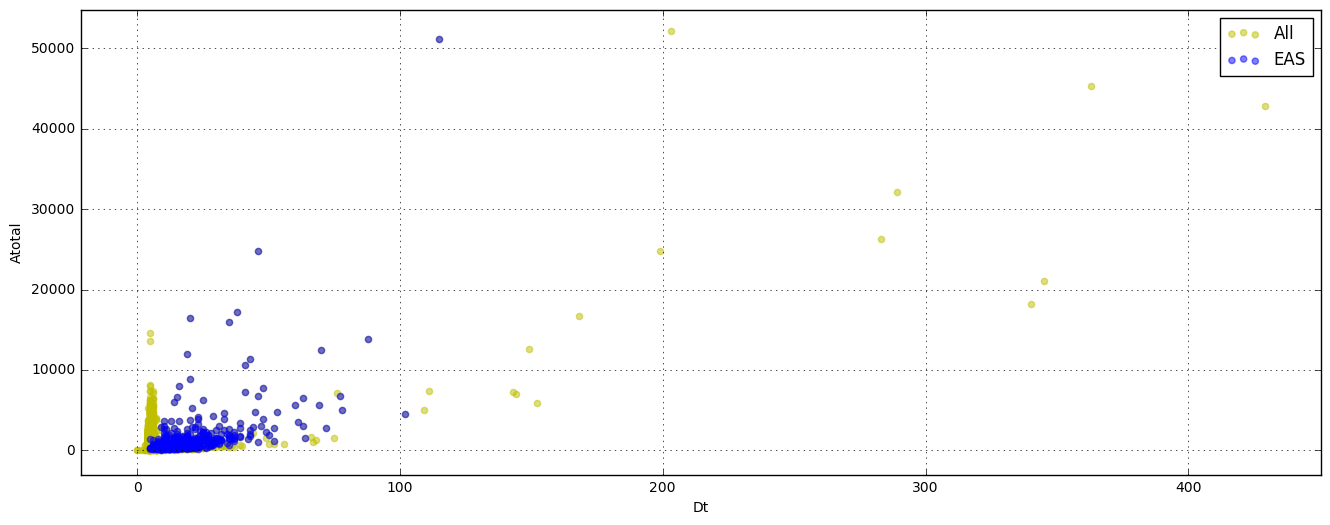

In [24]:
plt.figure(figsize=(16,6))
Amax = 70000
dtmax = 500
target_names = {True, False}

X  = datum['Dt'][    (datum['Atotal'] < Amax) & (datum['Dt']<dtmax) ]
Y  = datum['Atotal'][(datum['Atotal'] < Amax) & (datum['Dt']<dtmax) ]
XE = datum['Dt'][    (datum['Atotal'] < Amax) & (datum['Dt']<dtmax) & ((datum['EAS'] == 1))]
YE = datum['Atotal'][(datum['Atotal'] < Amax) & (datum['Dt']<dtmax) & ((datum['EAS'] == 1))]

plt.scatter(X,  Y, cmap=plt.cm.Paired, alpha = 0.5, color = 'y' , label=r"All")
plt.scatter(XE,YE, cmap=plt.cm.Paired, alpha = 0.5, color = 'b' , label=r"EAS")
plt.legend(loc=1)
plt.xlabel('Dt')
plt.ylabel('Atotal')    
plt.axis("tight")
plt.grid()

In [25]:
len(X)

1912

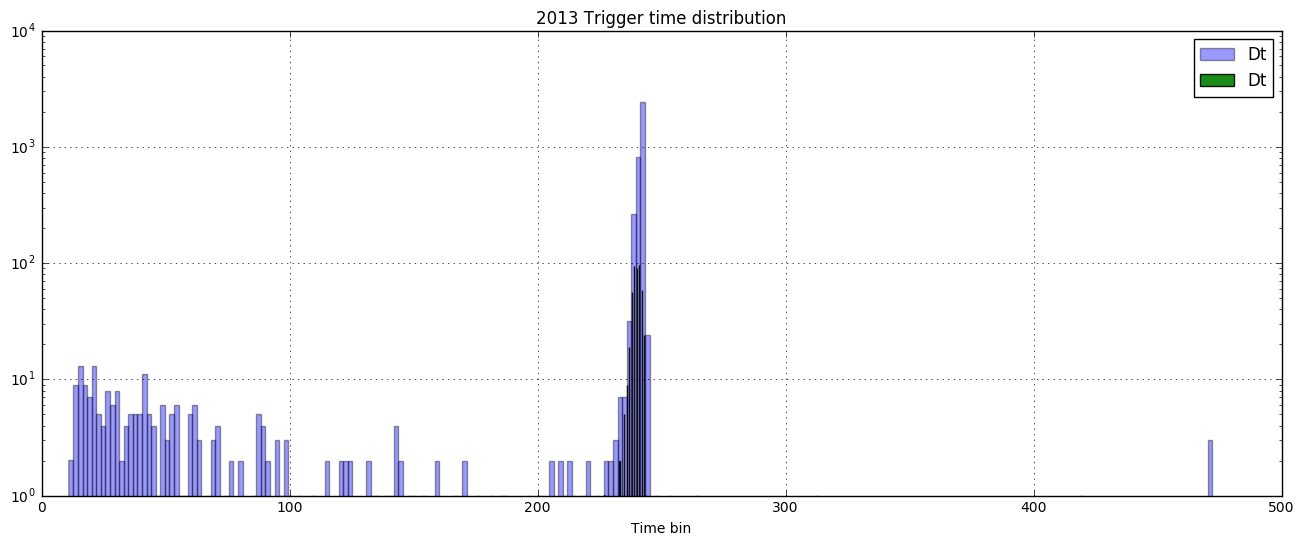

In [28]:
plt.figure(figsize=(16,6))
plt.hist(datum['TRIGGER'],  bins=250, alpha=0.4, label=r"Dt")
plt.hist(datum['TRIGGER'][datum['EAS'] == 1],  bins=250, alpha=0.9, label=r"Dt")
#plt.hist(AllTrig_g5[:], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.title('2013 Trigger time distribution')
plt.xlabel('Time bin')
plt.grid()

In [31]:
len(datum['TRIGGER'][datum['TRIGGER'] > 220])

3570

In [133]:
print(len(datum))
Amax = 70000
cand = datum[:][datum['Atotal'] < Amax] # 0 eas rejected
print(len(cand))
cand = cand[:][cand['TRIGGER'] > 220]   # 0 eas rejected
print(len(cand))
cand = cand[:][cand['TRIGGER'] < 300]  # 0 eas rejected
print(len(cand))
cand = cand[:][cand.Dt > 5]  # Dt>5: 5 eas rejected
print(len(cand))
print( datum[(datum.Dt == 5) & (datum.EAS == 1.0) ])

3813
1912
1787
1782
582
             Date      Time Type  Dt  Atotal  TG5time  TL2time  TL3time  \
EID                                                                       
11252  2013-03-10  01:45:53    E   5     294      243      242      242   
11450  2013-03-11  22:03:01    E   5     242      472      242      472   
11500  2013-03-11  23:38:48    E   5     240      472      239      239   
11772  2013-03-13  20:50:43    E   5     212      472      241      241   
14236  2013-03-16  01:49:50    L   5    1459      243      243      243   

       TRIGGER  EAS  
EID                  
11252      242  1.0  
11450      242  1.0  
11500      239  1.0  
11772      241  1.0  
14236      243  1.0  


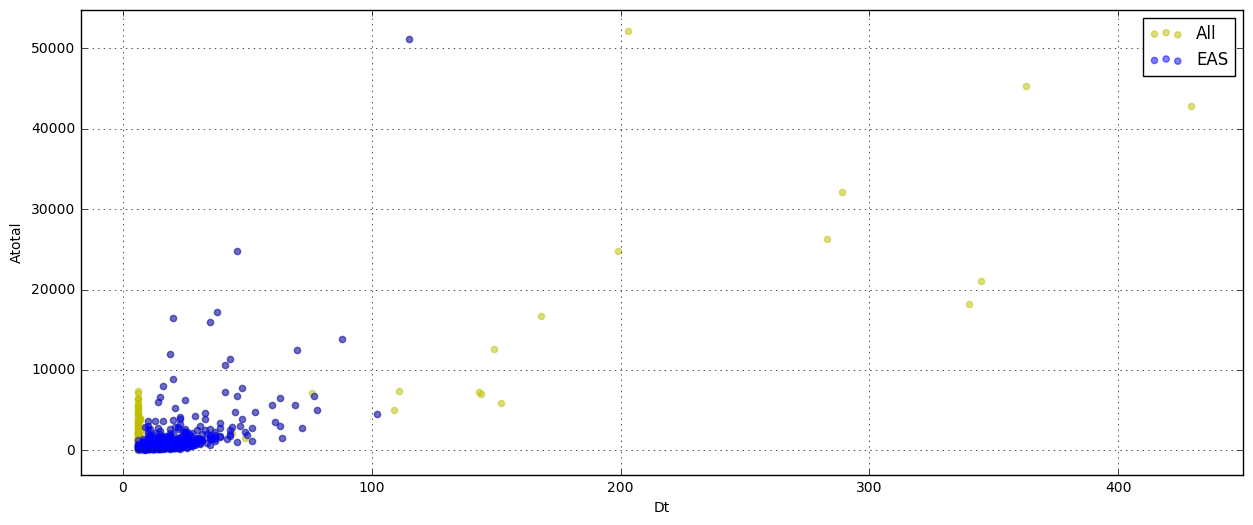

In [134]:
plt.figure(figsize=(15,6))
dtmax = 1000
X  = cand['Dt'][    (cand['Dt']<dtmax) ]
Y  = cand['Atotal'][(cand['Dt']<dtmax) ]
XE = cand['Dt'][    (cand['Dt']<dtmax) & ((cand['EAS'] == 1))]
YE = cand['Atotal'][(cand['Dt']<dtmax) & ((cand['EAS'] == 1))]

plt.scatter(X,  Y, cmap=plt.cm.Paired, alpha = 0.5, color = 'y' , label=r"All")
plt.scatter(XE,YE, cmap=plt.cm.Paired, alpha = 0.5, color = 'b' , label=r"EAS")
plt.legend(loc=1)
plt.xlabel('Dt')
plt.ylabel('Atotal')    
plt.axis("tight")
plt.grid()

In [135]:
print(len(X), len(XE))

582 457


In [123]:
print( datum[ (datum.Dt==6 ) & (datum.EAS == 1.0) ])

             Date      Time Type  Dt  Atotal  TG5time  TL2time  TL3time  \
EID                                                                       
10715  2013-03-09  19:29:47    E   6     574      242      241      242   
10789  2013-03-09  21:09:08    E   6     200      472      237      240   
10805  2013-03-09  21:31:57    E   6     505      472      241      242   
11326  2013-03-11  19:18:26    E   6    1296      242      241      241   
11930  2013-03-13  22:37:18    E   6     545      242      241      241   
11954  2013-03-14  20:21:18    E   6     377      472      239      241   
12060  2013-03-15  01:07:21    E   6     139      247      240      243   
12084  2013-03-15  01:42:59    E   6     456      472      242      243   
12094  2013-03-15  02:11:13    E   6     757      240      238      240   
14450  2013-03-16  02:10:36    E   6     692      243      243      243   

       TRIGGER  EAS  
EID                  
10715      241  1.0  
10789      237  1.0  
10805      